# Multiple Linear Regression
## Assignment Solution 

#### Problem Statement 
A US bike-sharing provider `BoomBikes` has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

#### Objectives 
- To find the features which are significant in predicting the demand of bikes.
- How well the features describe the demand.

**STEPS TO FOLLOW**
* Data Understanding and Exploration
* Data Visualisation
* Data preparation
* Model building and evaluation

### 1. DATA UNDERSTANDING AND EVALUATION
Firstly Let's import the necesarry Libraries

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Reading the dataset 
bike_shr = pd.read_csv("day.csv")

In [31]:
# Taking a look at the first few rows 
bike_shr.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [32]:
# Taking a look at the no. of rows and cols of the dataset 
bike_shr.shape

(730, 16)

In [33]:
# Taking a look at the Summary of the dataset
bike_shr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [34]:
# Looking at the statistical behaviour of the dataset 
bike_shr.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Understanding the data and some data preparation 
We need to manipulate some features as they are numeriacly misleading values

In [35]:
# Let's take a look at the season colm and change the dtype to category 
bike_shr['season'].astype('category').value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [36]:
# We need to change the col values to string value so that we can create dummy variables
bike_shr.loc[(bike_shr["season"]==1), "season"] = "spring"
bike_shr.loc[(bike_shr["season"]==2), "season"] = "summer"
bike_shr.loc[(bike_shr["season"]==3), "season"] = "fall"
bike_shr.loc[(bike_shr["season"]==4), "season"] = "winter"

In [37]:
# Let's take a look at the mnth colm and change the dtype to category 
bike_shr["mnth"].astype("category").value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [38]:
# We need to change the col values to string value so that we can create dummy variables because the numerical values are not ordinal but misleading
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the two columns
bike_shr[['mnth']] = bike_shr[['mnth']].apply(object_map)

In [39]:
# Let's take a look at the weekday colm and change the dtype to category 
bike_shr["weekday"].astype("category").value_counts()

weekday
0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [40]:
# We need to change the col values to string value so that we can create dummy variables because the numerical values are not ordinal but misleading
def str_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Applying the function to the two columns
bike_shr[["weekday"]] = bike_shr[["weekday"]].apply(str_map)

In [41]:
# Let's take a look at the weekday colm and change the dtype to category 
bike_shr["weathersit"].astype("category").value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [42]:
# We need to change the col values to string value so that we can create dummy variables because the numerical values are not ordinal but misleading

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
bike_shr.loc[(bike_shr["weathersit"] == 1) , "weathersit"] = "A"

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
bike_shr.loc[(bike_shr["weathersit"] == 2) , "weathersit"] = "B"

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
bike_shr.loc[(bike_shr["weathersit"] == 3) , "weathersit"] = "C"

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bike_shr.loc[(bike_shr["weathersit"] == 4) , "weathersit"] = "D"

### 2. DATA VISUALIZATION 
Let's check wheather the features have multicollinearity among them or not 

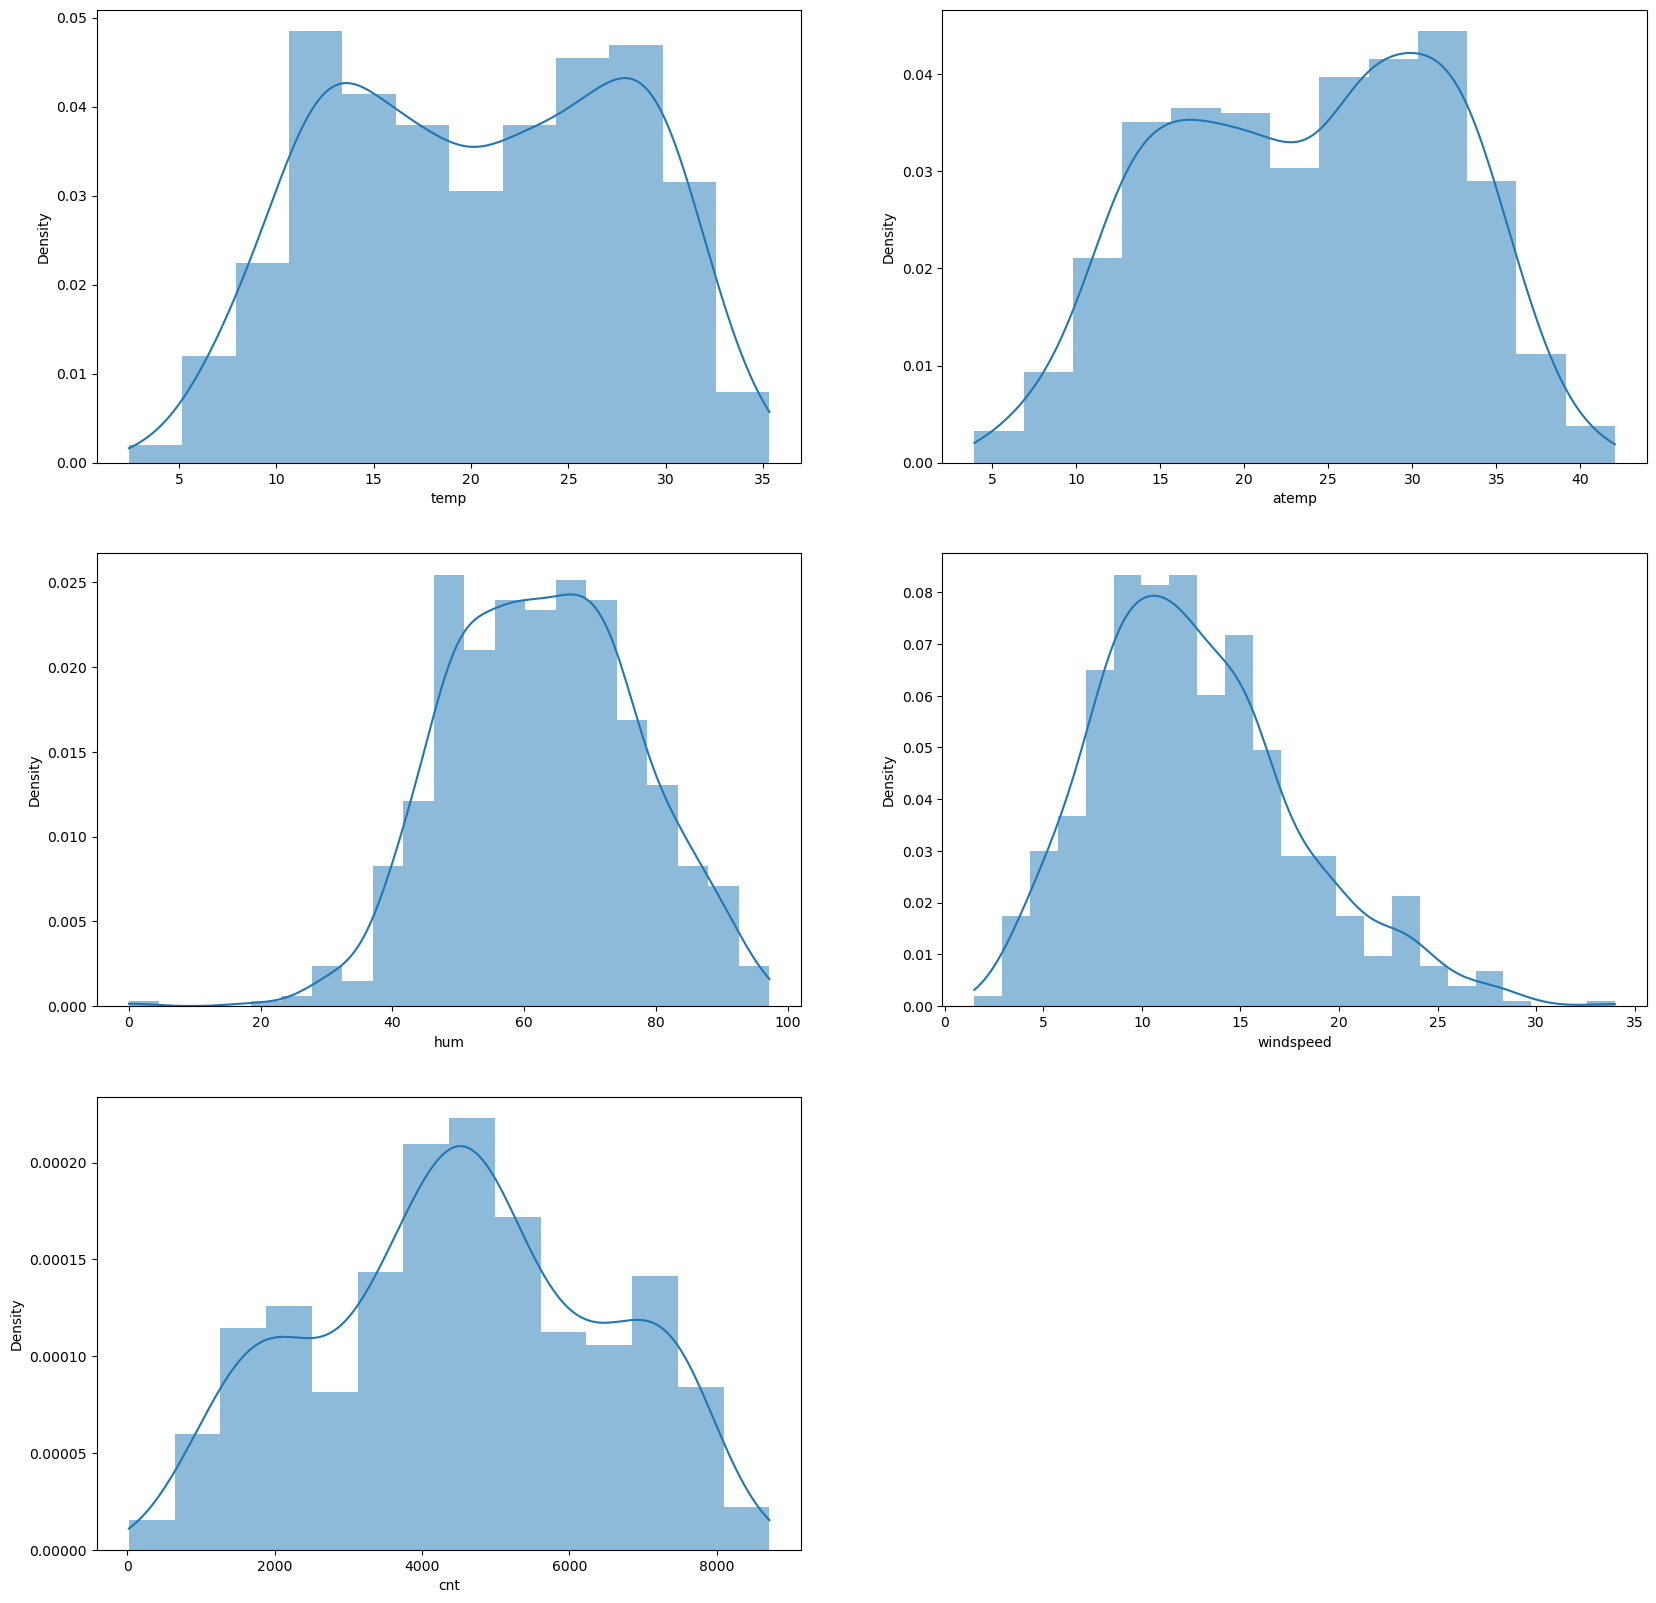

In [43]:
# Let's plot some numerical variables for examination
plt.figure(figsize=(20, 20))  

plt.subplot(3,2,1)
sns.histplot(bike_shr["temp"], label="100% Equities", kde=True, stat="density", linewidth=0)

plt.subplot(3,2,2)
sns.histplot(bike_shr["atemp"], label="100% Equities", kde=True, stat="density", linewidth=0)

plt.subplot(3,2,3)
sns.histplot(bike_shr["hum"], label="100% Equities", kde=True, stat="density", linewidth=0)

plt.subplot(3,2,4)
sns.histplot(bike_shr["windspeed"], label="100% Equities", kde=True, stat="density", linewidth=0)

plt.subplot(3,2,5)
sns.histplot(bike_shr["cnt"], label="100% Equities", kde=True, stat="density", linewidth=0)

plt.show()

In [44]:
# Converting date to datetime format
bike_shr['dteday'] = pd.to_datetime(bike_shr['dteday'], format='%d-%m-%Y')

In [45]:
# List out all categorical variables in the dataset
bike_shr_categorical=bike_shr.select_dtypes(exclude=['float64','datetime64','int64'])
bike_shr_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

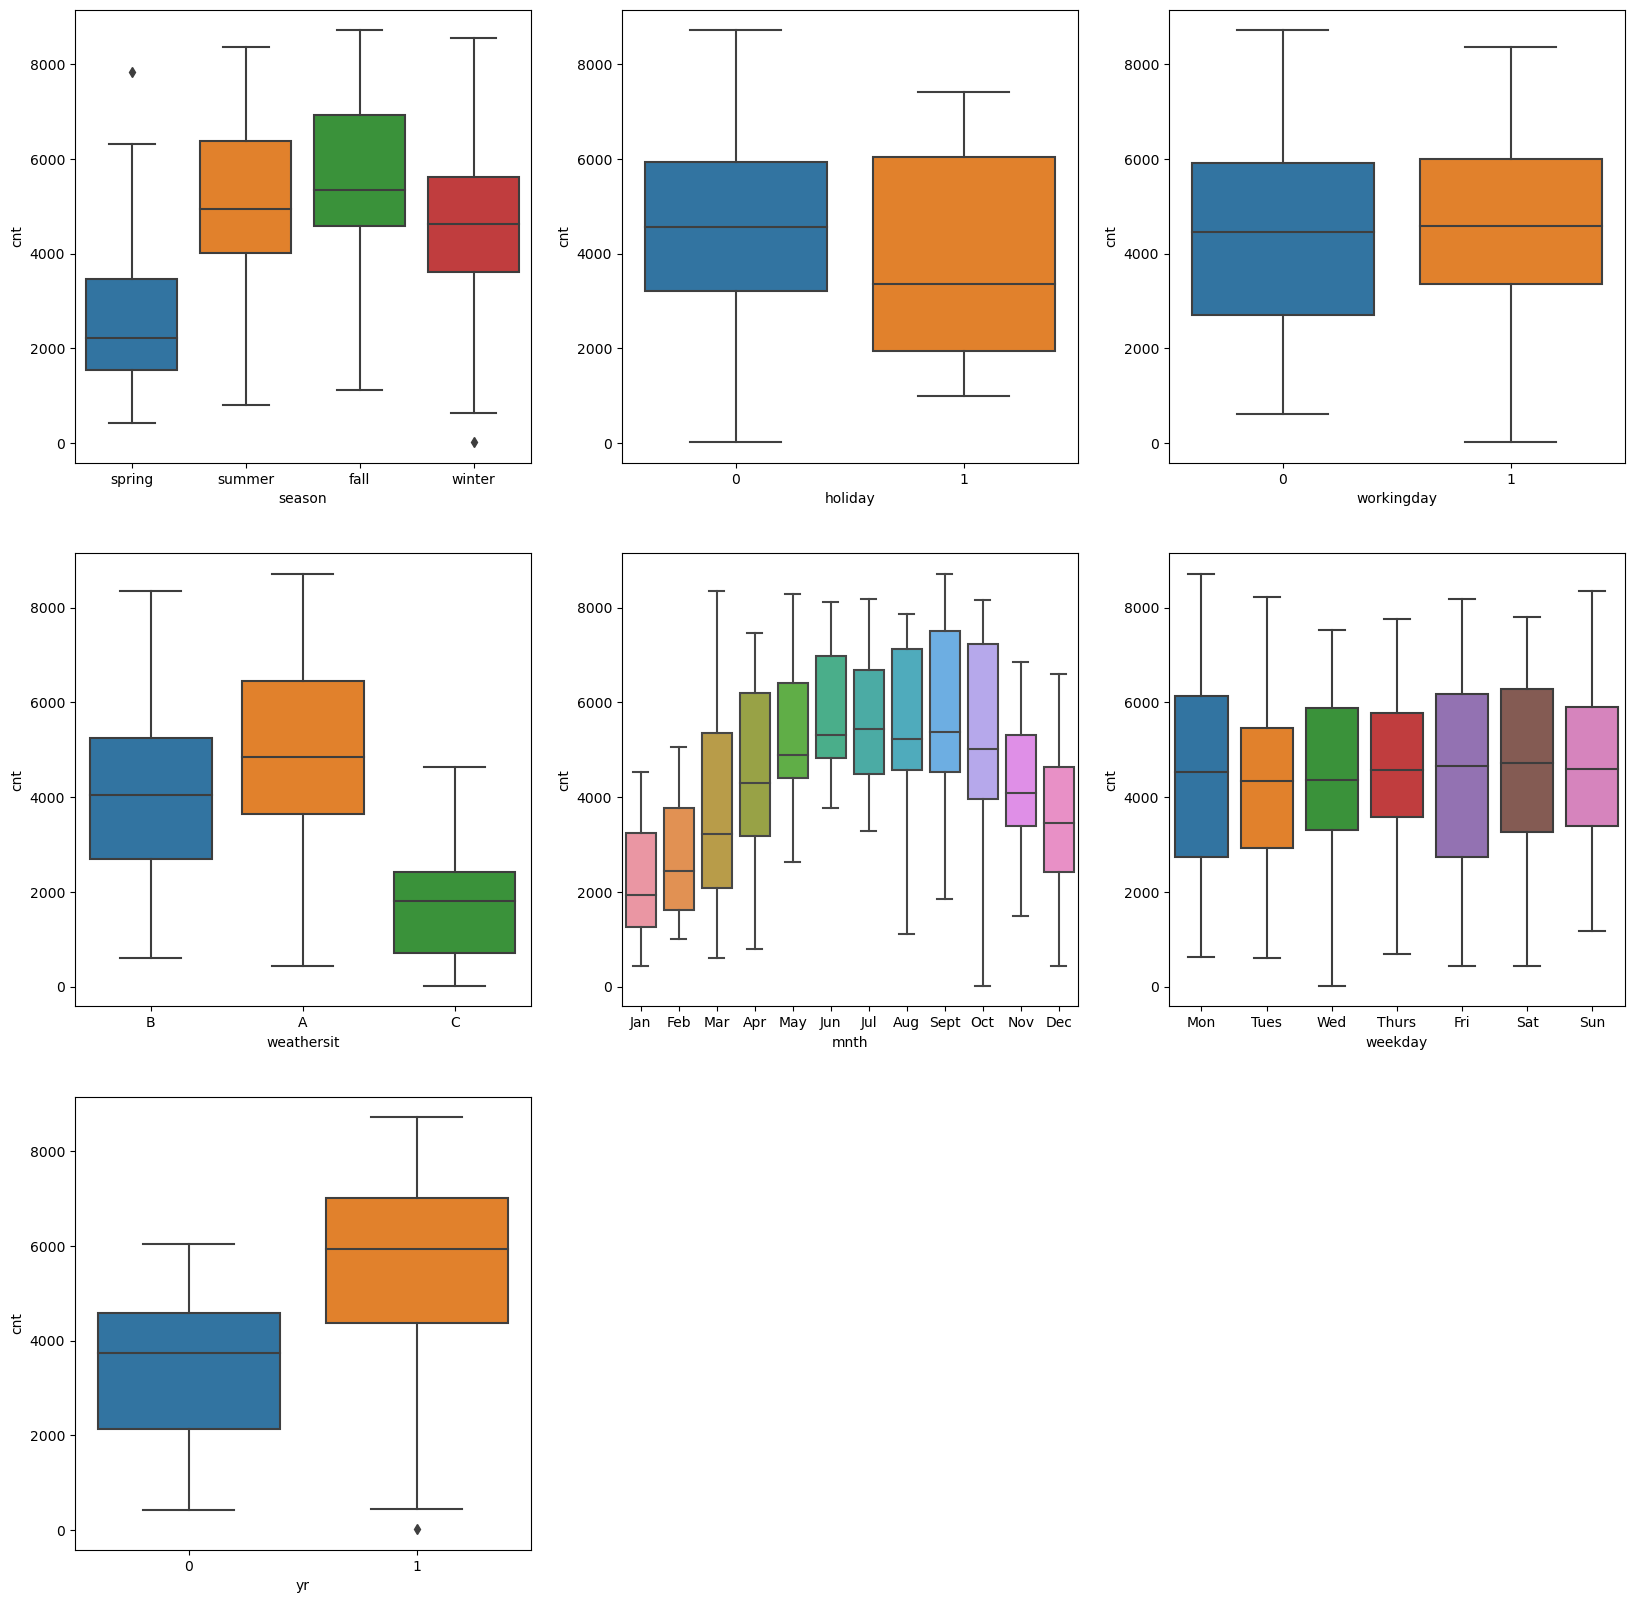

In [46]:
# Let's visualize categorical datas
plt.figure(figsize=(20, 20))  

plt.subplot(3,3,1)
sns.boxplot(x = "season", y = "cnt", data = bike_shr)

plt.subplot(3,3,2)
sns.boxplot(x = "holiday", y = "cnt", data = bike_shr)

plt.subplot(3,3,3)
sns.boxplot(x = "workingday", y = "cnt", data = bike_shr)

plt.subplot(3,3,4)
sns.boxplot(x = "weathersit", y = "cnt", data = bike_shr)

plt.subplot(3,3,5)
sns.boxplot(x = "mnth", y = "cnt", data = bike_shr)

plt.subplot(3,3,6)
sns.boxplot(x = "weekday", y = "cnt", data = bike_shr)

plt.subplot(3,3,7)
sns.boxplot(x = "yr", y = "cnt", data = bike_shr)

plt.show()

### Prepare numerical data for visualization
Let's convert their dtypes as float

In [47]:
# Converting "casual","registered" and "cnt" numeric variables to float. 
# This step is performed to seperate out categorical variables like 'yr','holiday','workingday' which have binary values in them
IntVariableList = ["casual","registered","cnt"]

for var in IntVariableList:
    bike_shr[var] = bike_shr[var].astype("float")

In [48]:
# All numeric variables in the dataset
bike_shr_numeric = bike_shr.select_dtypes(include=["float64"])
bike_shr_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


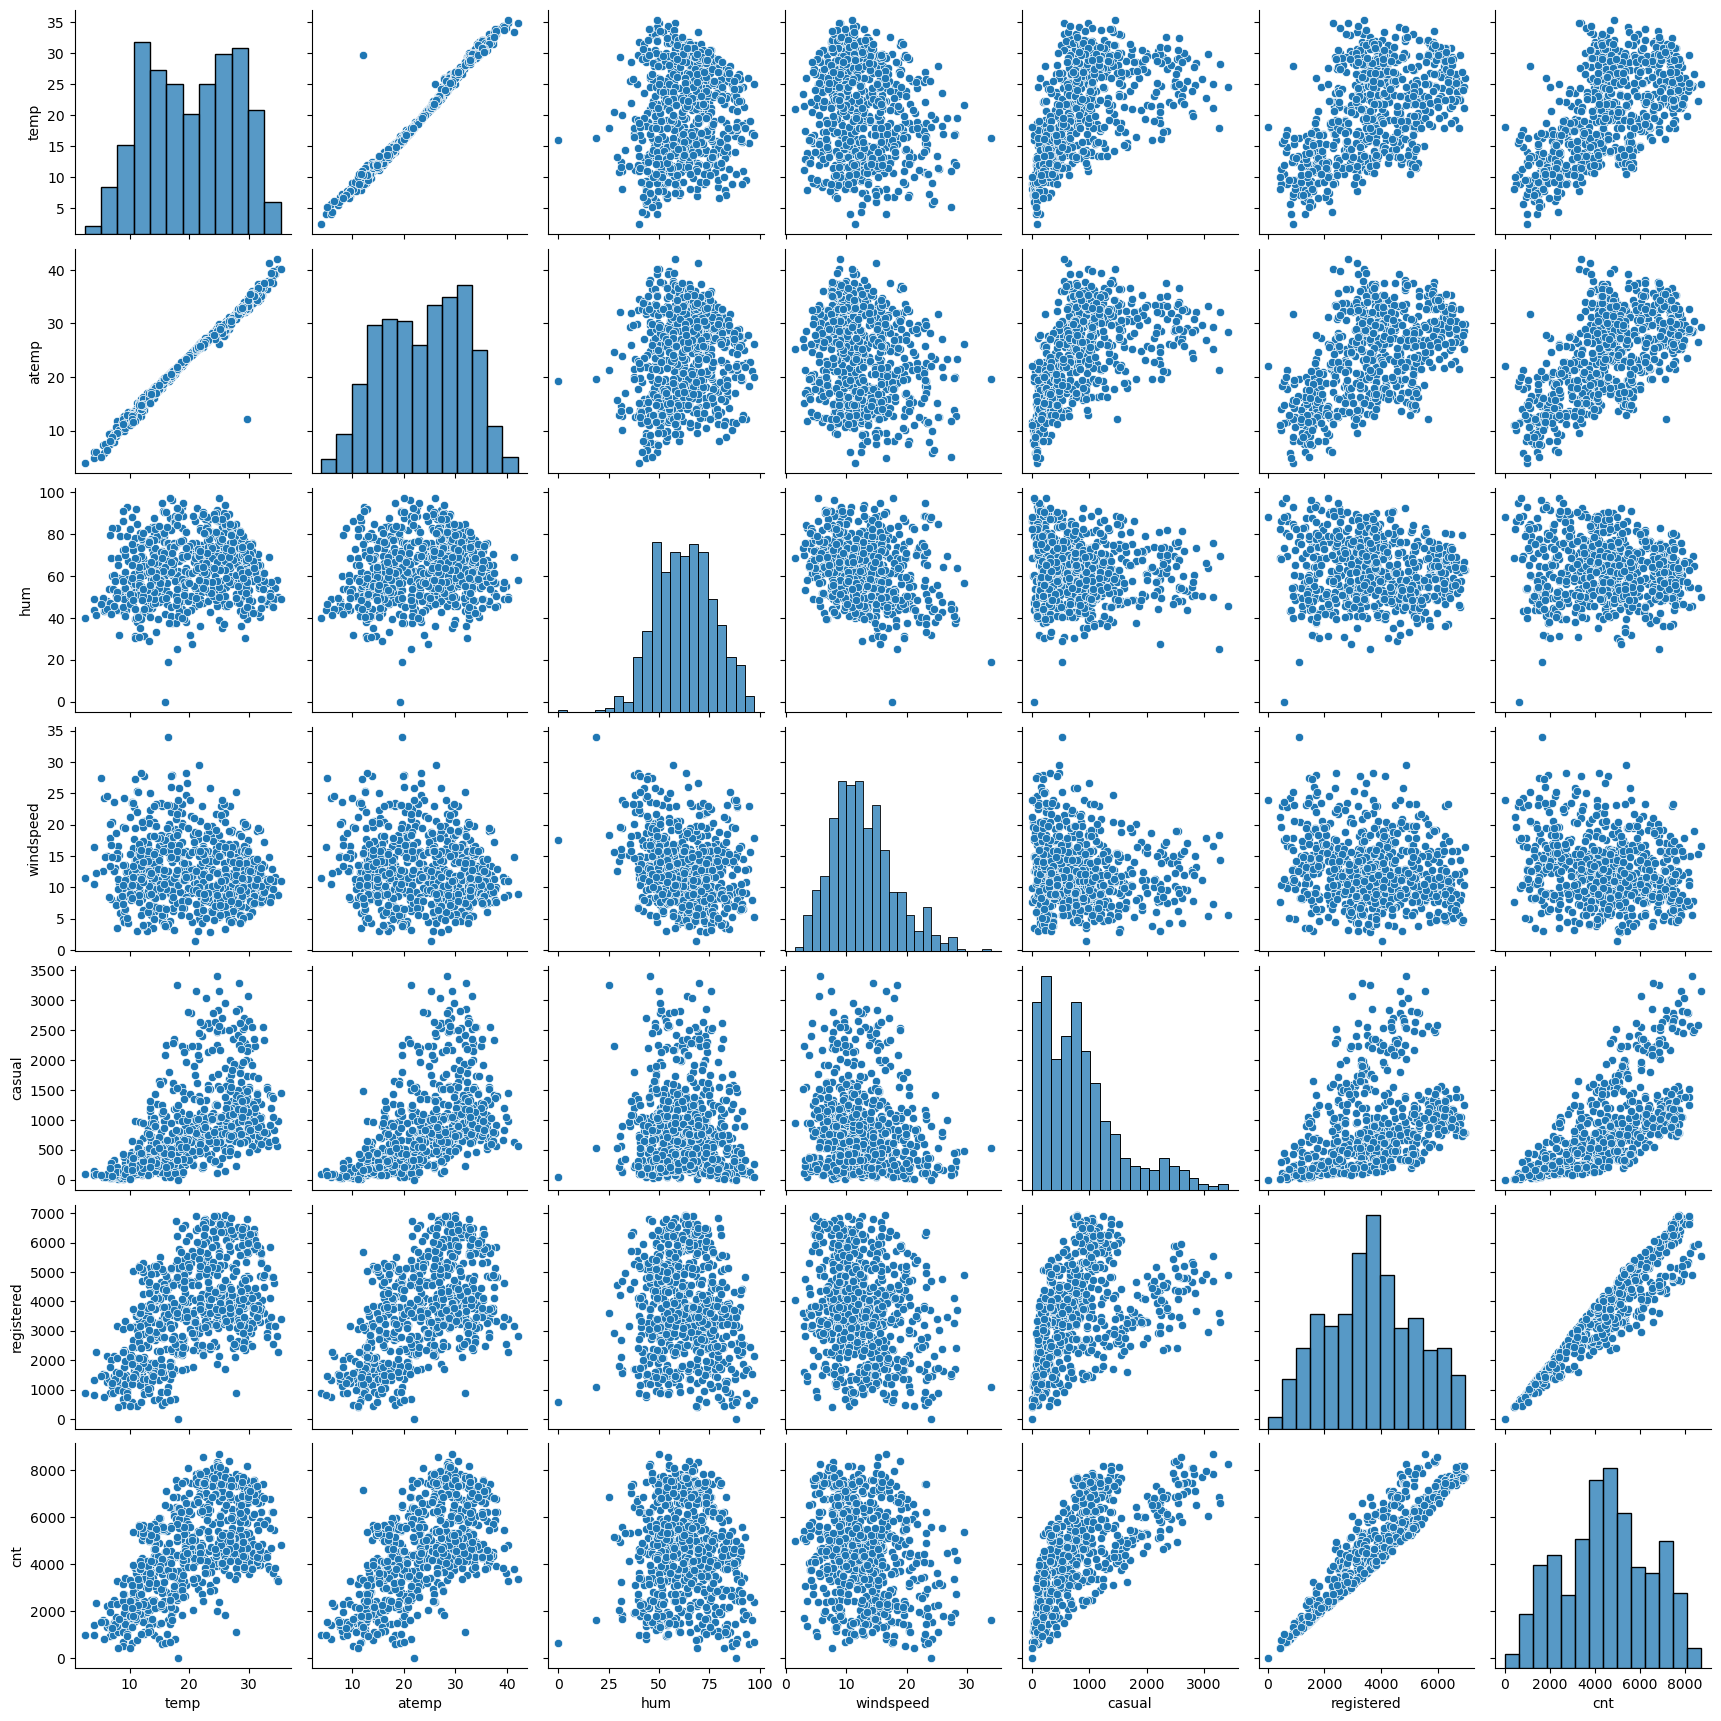

In [49]:
# Pairwise scatter plot
sns.pairplot(bike_shr_numeric)
plt.show()

In [51]:
# Correlation matrix
cor = bike_shr_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


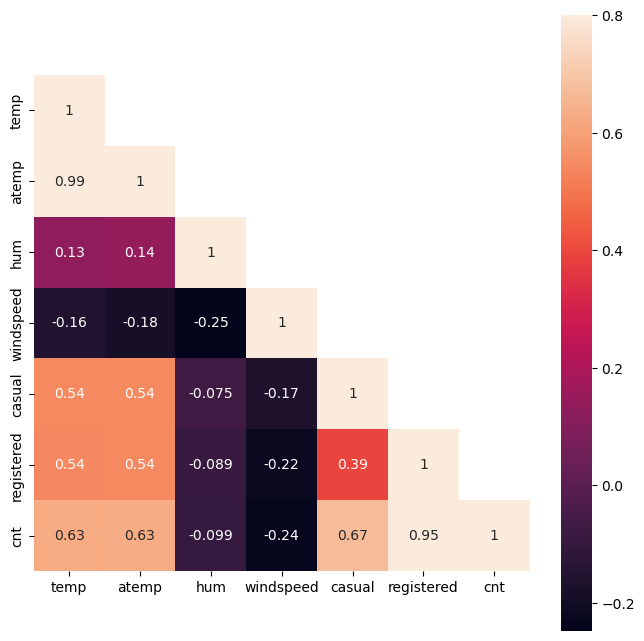

In [57]:
# Let's create a heatmap of numeric data for better visualization 
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(8,8)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

From the above ploted heatmap we have some insight aboat the data that 
- casual and registered are highly corelated with cnt as cnt is derived from adding them

For multicollinearity we have to check relationship btw the independent variables
- temp is highly collinear with atemp

In [58]:
# Removing atemp as it is highly correlated with temp
bike_shr.drop('atemp',axis=1,inplace=True)

### 3. DATA PREPATION 

Let's now prepare the data and build the model.
Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

In [59]:
# Subset all categorical variables
bike_shr_categorical=bike_shr.select_dtypes(include=['object'])

#### Dummy Variables
The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers. 

For this, we will use something called `dummy variables`.

In [61]:
# Convert into dummies
bike_shr_dummies = pd.get_dummies(bike_shr_categorical, drop_first=True, dtype=int)
bike_shr_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# we need to drop all the duplicate categorical variables
bike_shr = bike_shr.drop(list(bike_shr_categorical.columns), axis=1)

In [64]:
# Concatenate dummy variables with the original dataframe
bike_shr = pd.concat([bike_shr, bike_shr_dummies], axis=1)

In [65]:
# Let's check the first few rows
bike_shr.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-01-02,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-01-03,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-01-04,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-01-05,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
bike_shr = bike_shr.drop(['instant','dteday'], axis = 1, inplace = False)
bike_shr.head()

KeyError: "['instant', 'dteday'] not found in axis"

### 4. MODEL BUILDING AND EVALUATION 

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [70]:
np.random.seed(0)
df_train, df_test = train_test_split(bike_shr, train_size=0.7, test_size=0.3, random_state=100)
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,...,0,0,0,0,0,0,0,1,1,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,1,0,0,0,0,0,1,0


### Scaling

we need to scale the numeric variable data so the data values become camparable
- we will use MinMaxScaler from sklearn library 
- we will not scale the dummy variable data.

In [73]:
scaler = MinMaxScaler()

In [74]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [75]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.309357,0.812446,0.764151,0,...,0,0,0,0,0,0,0,1,1,0
578,1,0,1,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835,0,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017,1,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586,0,...,0,0,1,0,0,0,0,0,1,0


In [76]:
# Let's check the statistical behaviour
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


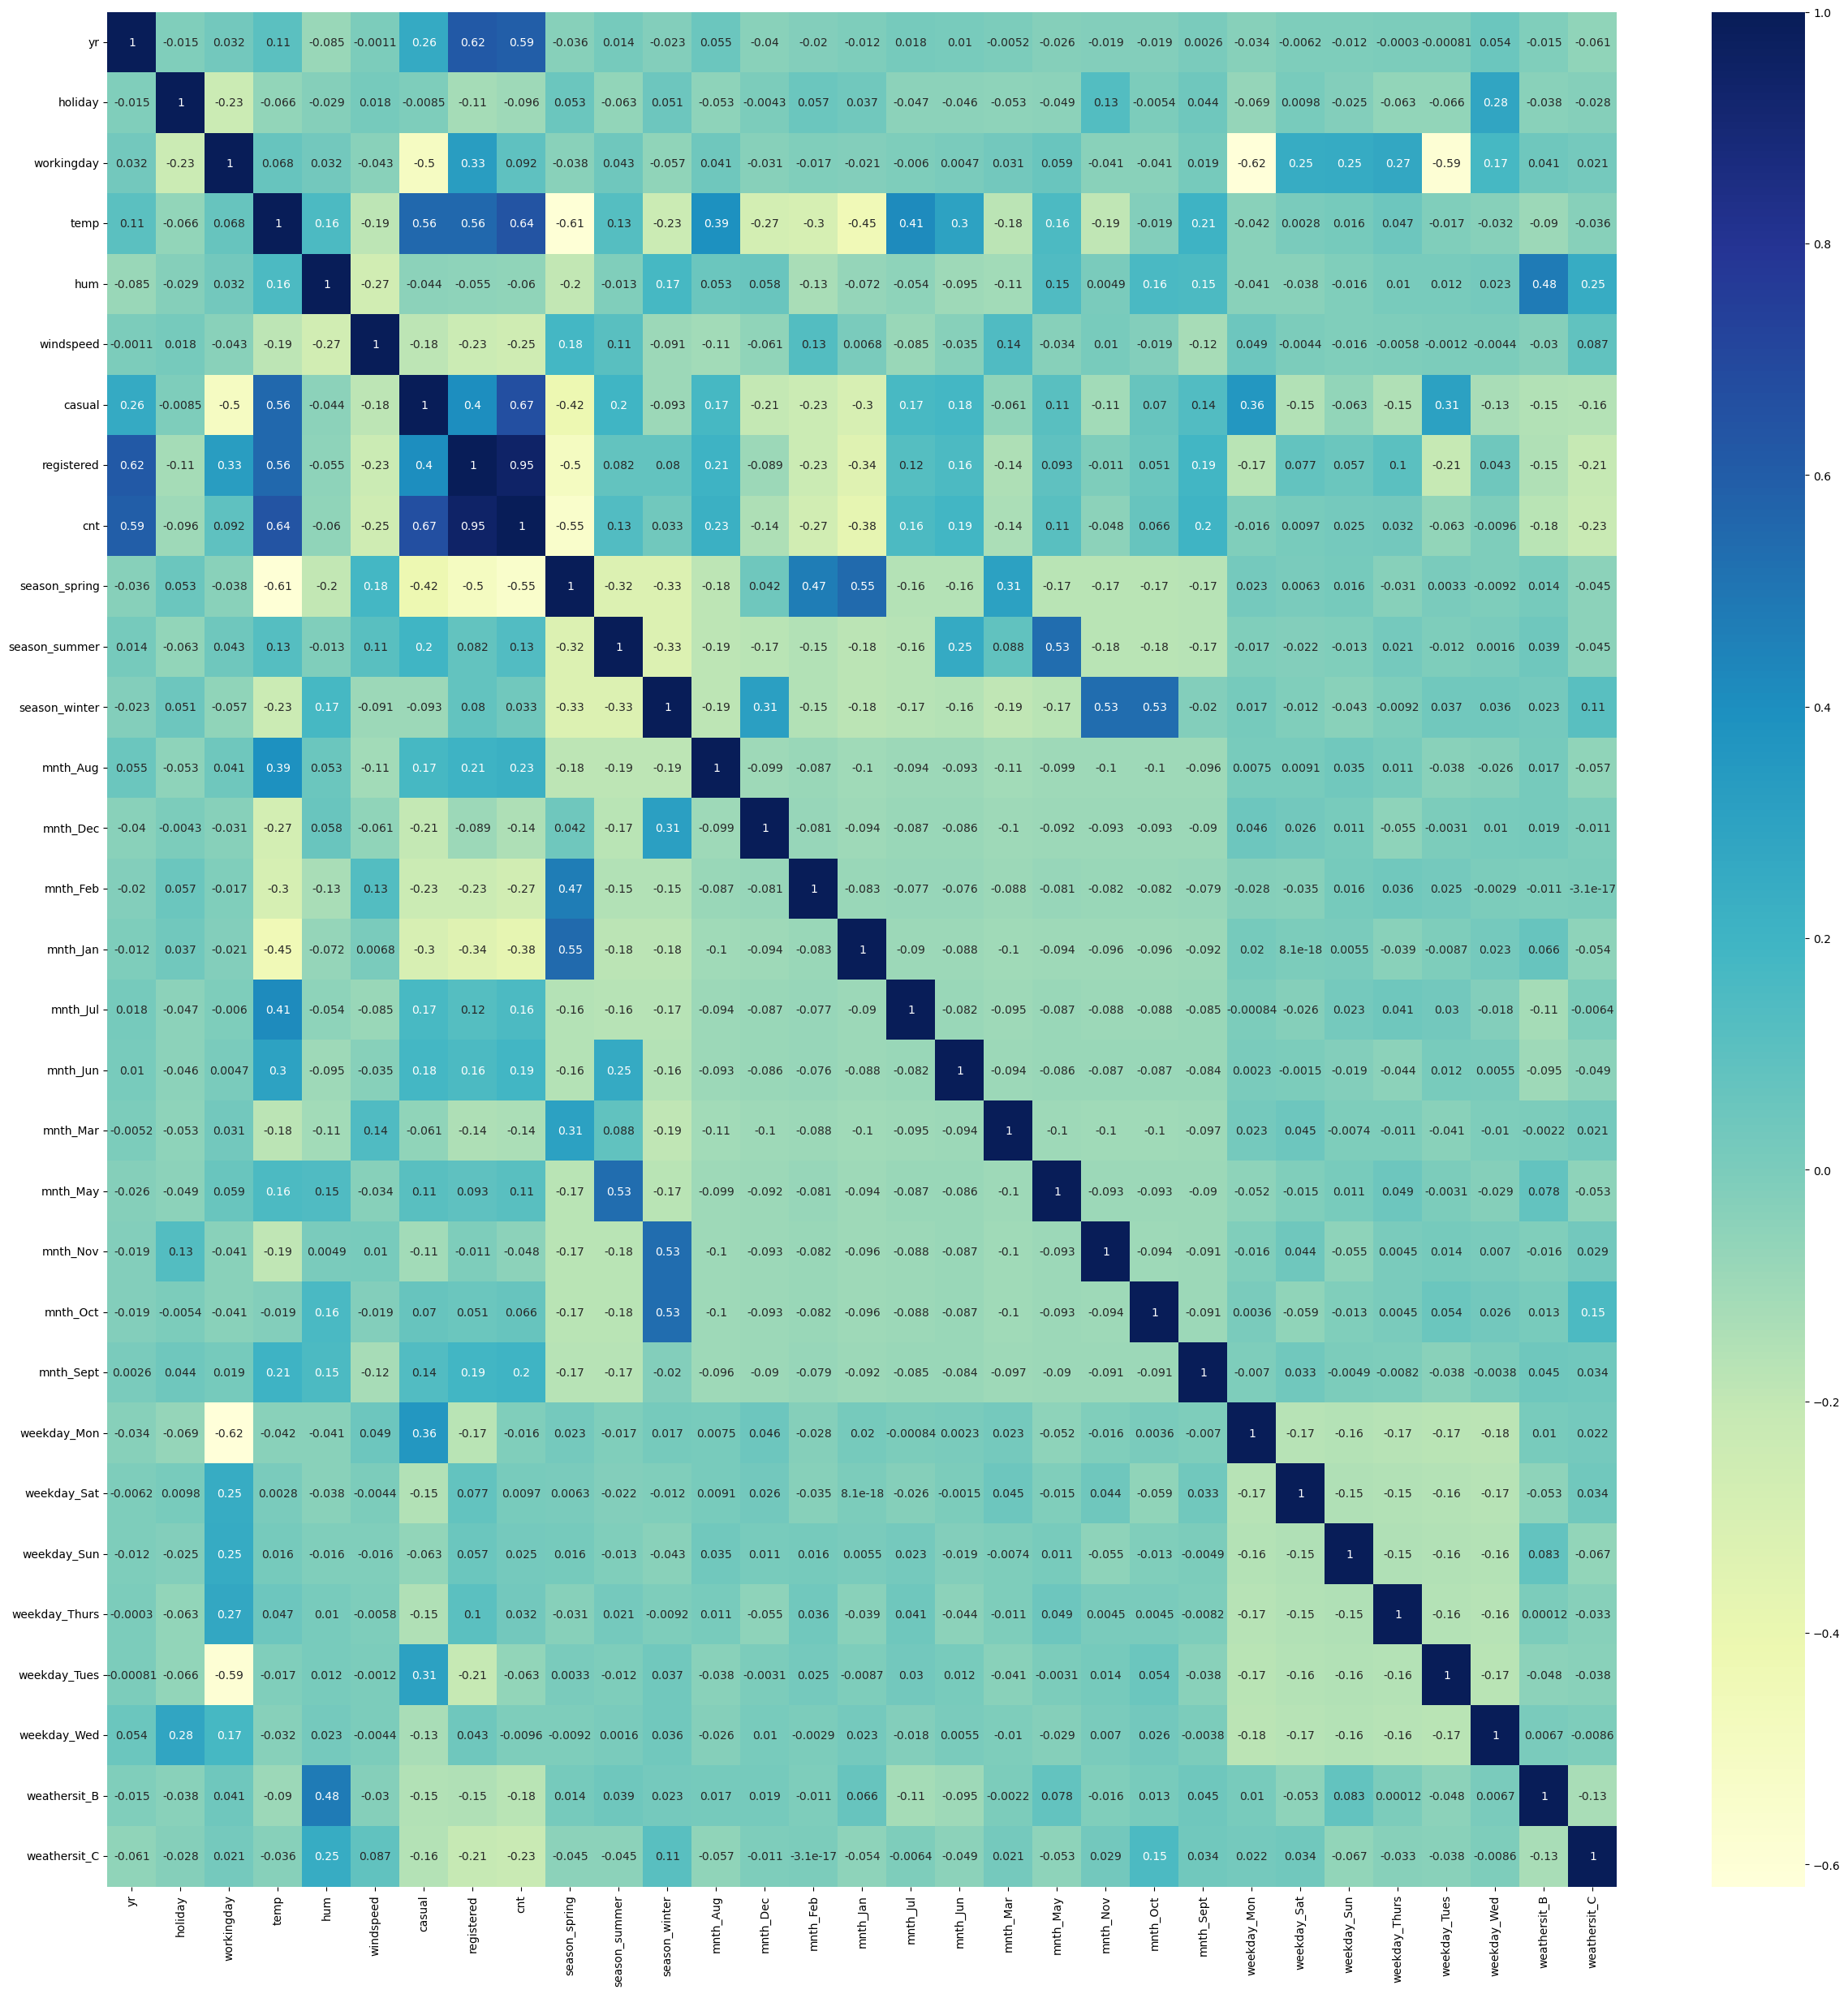

In [78]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

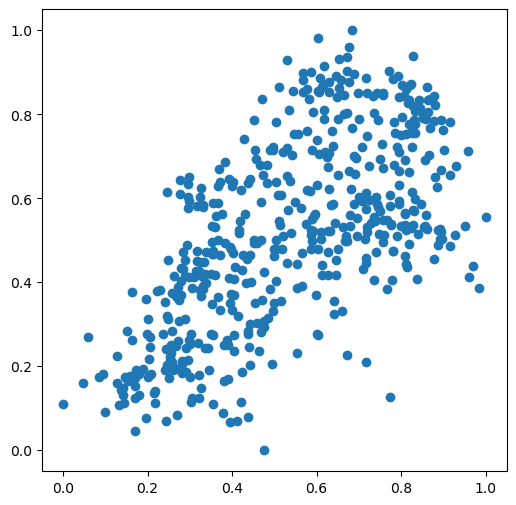

In [80]:
# Because temp is highly co-related with cnt therefore let's plot a graph btw them
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [81]:
# Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop("cnt")
X_train = df_train.drop(["casual", "registered"], axis=1)

In [82]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


### Building the first model with all the features

Let's now build our first model with all the features.

In [87]:
# Let's use statsmodel library 
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const            0.242930
yr               0.232116
holiday          0.006726
workingday       0.093651
temp             0.450562
hum             -0.151340
windspeed       -0.186453
season_spring   -0.048159
season_summer    0.038725
season_winter    0.105847
mnth_Aug         0.014404
mnth_Dec        -0.045586
mnth_Feb        -0.032282
mnth_Jan        -0.062777
mnth_Jul        -0.040350
mnth_Jun        -0.002972
mnth_Mar         0.001045
mnth_May         0.023940
mnth_Nov        -0.041851
mnth_Oct         0.007534
mnth_Sept        0.081060
weekday_Mon      0.098544
weekday_Sat     -0.003849
weekday_Sun      0.005388
weekday_Thurs   -0.013502
weekday_Tues     0.044008
weekday_Wed     -0.015519
weathersit_B    -0.061066
weathersit_C    -0.257443
dtype: float64

In [90]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          8.74e-182
Time:                        17:07:44   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2429      0.035      6.854

In [93]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [94]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2.32231192e-01 -3.10041566e+11 -3.10041566e+11  4.50378418e-01
 -1.51565552e-01 -1.86669588e-01 -4.79583740e-02  3.84597778e-02
  1.05941772e-01  1.41754150e-02 -4.57916260e-02 -3.27720642e-02
 -6.32629395e-02 -4.03747559e-02 -3.00788879e-03  1.24359131e-03
  2.41088867e-02 -4.21791077e-02  7.37380981e-03  8.06999207e-02
 -3.10041566e+11 -3.81278992e-03  5.34057617e-03 -1.34345293e-02
 -3.10041566e+11 -1.56707764e-02 -6.08749390e-02 -2.57354736e-01]
310041566323.06573


### Model building using RFE

In [100]:
# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select=15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[ True  True  True  True  True  True  True False  True False False False
  True  True False False False False False  True  True False False False
  True False  True  True]
[ 1  1  1  1  1  1  1  6  1  7  3  4  1  1 13 14  5  2 10  1  1 12 11  9
  1  8  1  1]


In [102]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Jan,mnth_Jul,mnth_Sept,weekday_Mon,weekday_Tues,weathersit_B,weathersit_C
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,0,1,0,1,0


In [103]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          4.03e-190
Time:                        17:27:36   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2503      0.025      9.865

In [104]:
a = X_train_rfe1.drop('const',axis=1)

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,41.60
11,weekday_Mon,10.14
12,weekday_Tues,9.82
3,temp,3.19
6,season_spring,2.72
1,holiday,2.58
4,hum,1.90
7,season_winter,1.81
13,weathersit_B,1.57
8,mnth_Jan,1.55


In [107]:
# RFE with 7 features
lm = LinearRegression()
rfe2 = RFE(lm, n_features_to_select=7)

# Fit with 7 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_) 

[ True  True  True  True False  True False False False False False False
 False False False False False False False False  True False False False
 False False False  True]
[ 1  1  1  1  3  1  4 14  8 15 11 12  9  5 21 22 13 10 18  7  1 20 19 17
  2 16  6  1]


In [108]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,workingday,temp,windspeed,weekday_Mon,weathersit_C
653,1.0,1,0,1,0.509887,0.300794,0,0
576,1.0,1,0,1,0.815169,0.264686,0,0
426,1.0,1,0,0,0.442393,0.255342,1,0
728,1.0,1,0,0,0.245101,0.663106,0,0
482,1.0,1,0,0,0.395666,0.188475,1,0


In [109]:
# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     209.7
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          1.35e-144
Time:                        17:30:34   Log-Likelihood:                 387.15
No. Observations:                 510   AIC:                            -758.3
Df Residuals:                     502   BIC:                            -724.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1306      0.022      5.988   

In [110]:
b = X_train_rfe2.drop('const',axis=1)

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.38
2,workingday,4.07
4,windspeed,3.38
0,yr,2.01
5,weekday_Mon,1.69
1,holiday,1.10
6,weathersit_C,1.04


### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [113]:
y_train_cnt = lm2.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

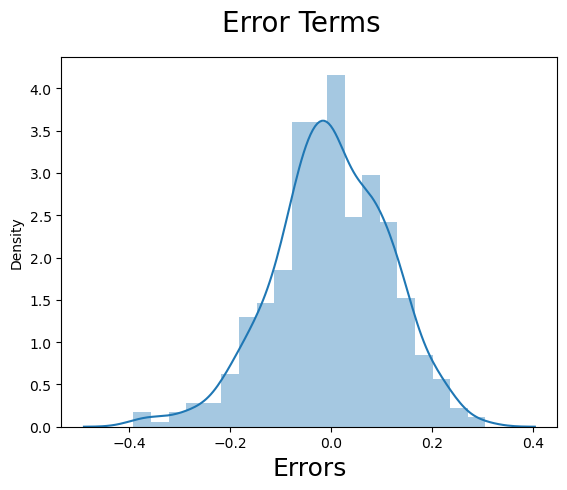

In [114]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)

### Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [115]:
X_train_rfe2

,const,yr,holiday,workingday,temp,windspeed,weekday_Mon,weathersit_C
653,1.0,1,0,1,0.509887,0.300794,0,0
576,1.0,1,0,1,0.815169,0.264686,0,0
426,1.0,1,0,0,0.442393,0.255342,1,0
728,1.0,1,0,0,0.245101,0.663106,0,0
482,1.0,1,0,0,0.395666,0.188475,1,0
...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,0.824514,0.355596,0,0
578,1.0,1,0,1,0.863973,0.187140,0,0
53,1.0,0,0,1,0.202618,0.111379,0,0
350,1.0,0,0,0,0.248216,0.431816,1,0


In [116]:
# let's recall the set of variables which are to be scaled
df_test[var] = scaler.transform(df_test[var])

In [117]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [118]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [120]:
# Let's check the list 'col2' which had the 6 variables RFE had selected
col2=b.columns
col2

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'weekday_Mon',
       'weathersit_C'],
      dtype='object')

In [121]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[col2]

In [122]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   workingday    219 non-null    int64  
 4   temp          219 non-null    float64
 5   windspeed     219 non-null    float64
 6   weekday_Mon   219 non-null    int32  
 7   weathersit_C  219 non-null    int32  
dtypes: float64(3), int32(2), int64(3)
memory usage: 13.7 KB


In [123]:
# Making predictions
y_pred = lm2.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

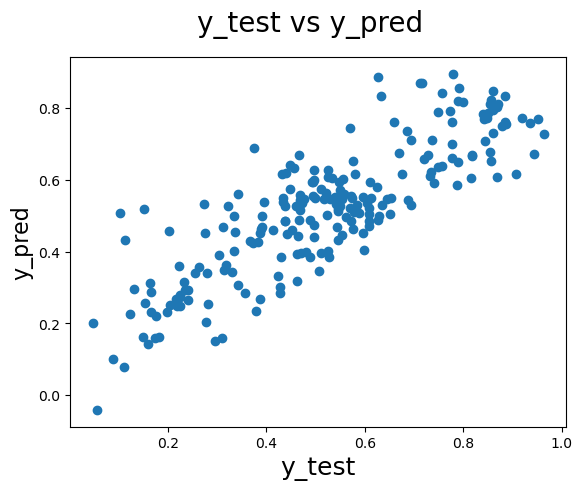

In [124]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [126]:
# r2_score for 6 variables
r2_score(y_test, y_pred)

0.7038333506294709

### Checking the correlations between the final predictor variables

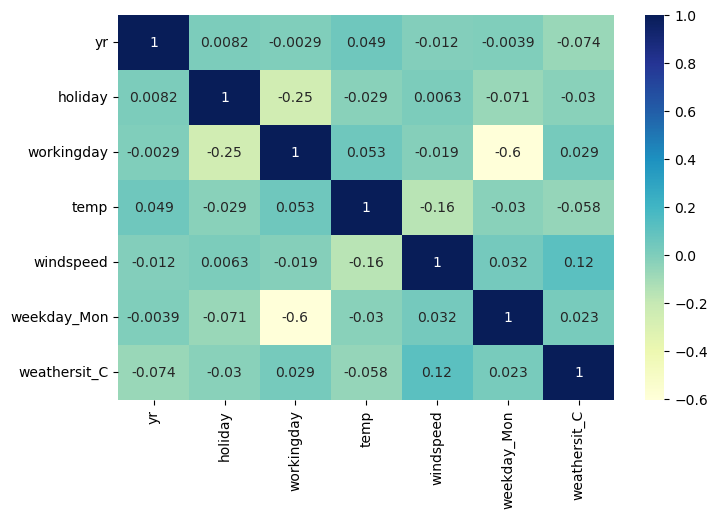

In [128]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(bike_shr[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()